In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('d:/universidade/mestrado/Semestre2/DeepLearning/AdvancedMachineLearning/TP/TP6/flower_photos', origin=dataset_url)
data_dir = pathlib.Path(data_dir)

In [3]:
data_dir

WindowsPath('d:/universidade/mestrado/Semestre2/DeepLearning/AdvancedMachineLearning/TP/TP6/flower_photos')

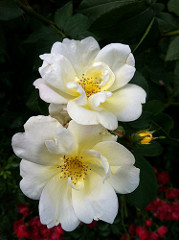

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="both",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Problem 1
Create 4 different models, one at a time, by modifying the reference model in the following manner:

0. Using the reference model

In [9]:
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])



In [10]:
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy']
)

In [11]:
epochs = 15
baseline_hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 108s 710ms/step - loss: 1.2460 - accuracy: 0.4503 - val_loss: 1.1586 - val_accuracy: 0.5286
Epoch 2/15
92/92 [==============================] - 57s 616ms/step - loss: 1.0325 - accuracy: 0.5937 - val_loss: 1.0085 - val_accuracy: 0.6158
Epoch 3/15
92/92 [==============================] - 58s 625ms/step - loss: 0.9139 - accuracy: 0.6431 - val_loss: 0.9352 - val_accuracy: 0.6390
Epoch 4/15
92/92 [==============================] - 56s 611ms/step - loss: 0.8419 - accuracy: 0.6747 - val_loss: 0.8761 - val_accuracy: 0.6594
Epoch 5/15
92/92 [==============================] - 56s 609ms/step - loss: 0.7852 - accuracy: 0.7071 - val_loss: 0.9437 - val_accuracy: 0.6376
Epoch 6/15
92/92 [==============================] - 56s 610ms/step - loss: 0.7447 - accuracy: 0.7180 - val_loss: 0.8271 - val_accuracy: 0.6975
Epoch 7/15
92/92 [==============================] - 56s 616ms/step - loss: 0.7058 - accuracy: 0.7364 - val_loss: 0.8065 - val_accuracy: 0.683

Text(0.5, 1.0, 'Training and Validation Loss')

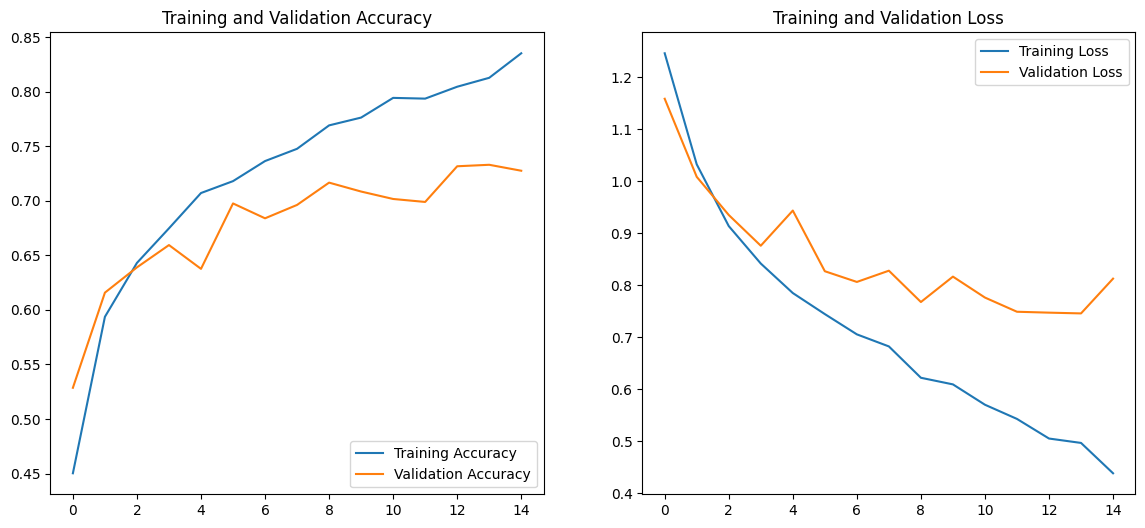

In [12]:
acc = baseline_hist.history['accuracy']
val_acc = baseline_hist.history['val_accuracy']

loss = baseline_hist.history['loss']
val_loss = baseline_hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

We can see that the accuracy evolves in a log-like trend. It seems to start over-fitting around epoch 12, since there is a big improvement in the training loss/accuracy values in the training set without a big change in the validation set

1. Using the mean squared error as loss function

In [13]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy']
)

In [16]:
epochs=15
hist_mse = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/15
92/92 [==============================] - 59s 605ms/step - loss: 1.7344 - accuracy: 0.1662 - val_loss: 1.5228 - val_accuracy: 0.1744
Epoch 2/15
92/92 [==============================] - 56s 605ms/step - loss: 1.4034 - accuracy: 0.1914 - val_loss: 1.3462 - val_accuracy: 0.1962
Epoch 3/15
92/92 [==============================] - 56s 607ms/step - loss: 1.2482 - accuracy: 0.1999 - val_loss: 1.2032 - val_accuracy: 0.1975
Epoch 4/15
92/92 [==============================] - 57s 617ms/step - loss: 1.1887 - accuracy: 0.2061 - val_loss: 1.1294 - val_accuracy: 0.2343
Epoch 5/15
92/92 [==============================] - 56s 608ms/step - loss: 1.1870 - accuracy: 0.2265 - val_loss: 1.2265 - val_accuracy: 0.1989
Epoch 6/15
92/92 [==============================] - 56s 611ms/step - loss: 1.1536 - accuracy: 0.2248 - val_loss: 1.1464 - val_accuracy: 0.2316
Epoch 7/15
92/92 [==============================] - 57s 617ms/step - loss: 1.0985 - accuracy: 0.2095 - val_loss: 1.1518 - val_accuracy: 0.2016

Text(0.5, 1.0, 'Training and Validation Loss')

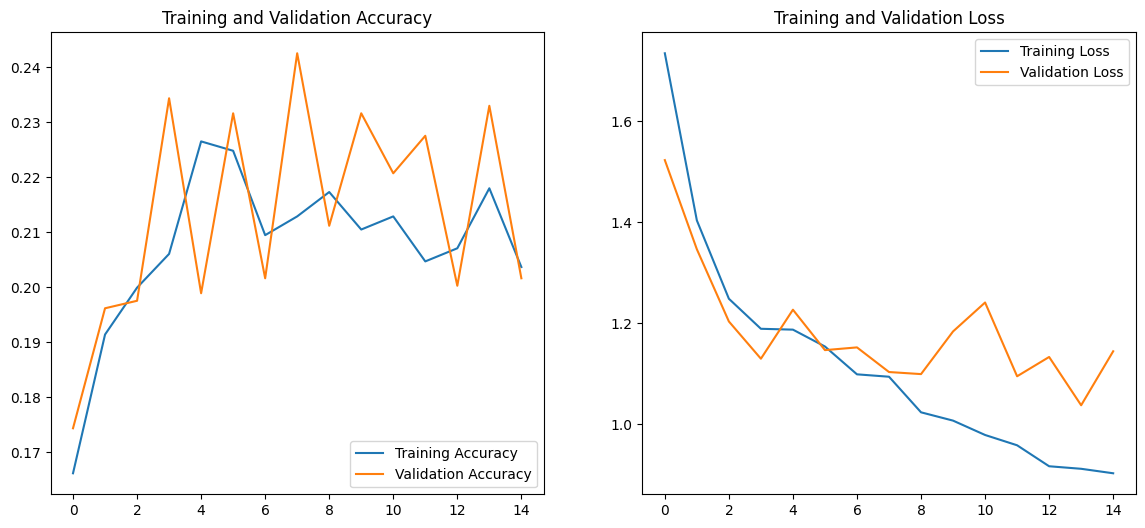

In [17]:
acc = hist_mse.history['accuracy']
val_acc = hist_mse.history['val_accuracy']

loss = hist_mse.history['loss']
val_loss = hist_mse.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

By looking to the historic of the training we can see that the accuracy values are no where near the previous model. The accuracy converges to a very small value for both the training and the validation accuracy. This metric has a bad impact in the training of the model. <br>
It seems that there is overfitting from epoch 4.

2. Using Dropout probability of 40%

In [18]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [20]:
epochs = 15
hist_drop = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 59s 608ms/step - loss: 1.2879 - accuracy: 0.4370 - val_loss: 1.1017 - val_accuracy: 0.5504
Epoch 2/15
92/92 [==============================] - 56s 609ms/step - loss: 1.0209 - accuracy: 0.5841 - val_loss: 1.0016 - val_accuracy: 0.5926
Epoch 3/15
92/92 [==============================] - 57s 615ms/step - loss: 0.9363 - accuracy: 0.6311 - val_loss: 1.0639 - val_accuracy: 0.6035
Epoch 4/15
92/92 [==============================] - 56s 606ms/step - loss: 0.8491 - accuracy: 0.6747 - val_loss: 0.8607 - val_accuracy: 0.6540
Epoch 5/15
92/92 [==============================] - 56s 610ms/step - loss: 0.7836 - accuracy: 0.7010 - val_loss: 0.9602 - val_accuracy: 0.6335
Epoch 6/15
92/92 [==============================] - 57s 616ms/step - loss: 0.7318 - accuracy: 0.7146 - val_loss: 0.7862 - val_accuracy: 0.6894
Epoch 7/15
92/92 [==============================] - 57s 621ms/step - loss: 0.6765 - accuracy: 0.7415 - val_loss: 0.7640 - val_accuracy: 0.6975

Text(0.5, 1.0, 'Training and Validation Loss')

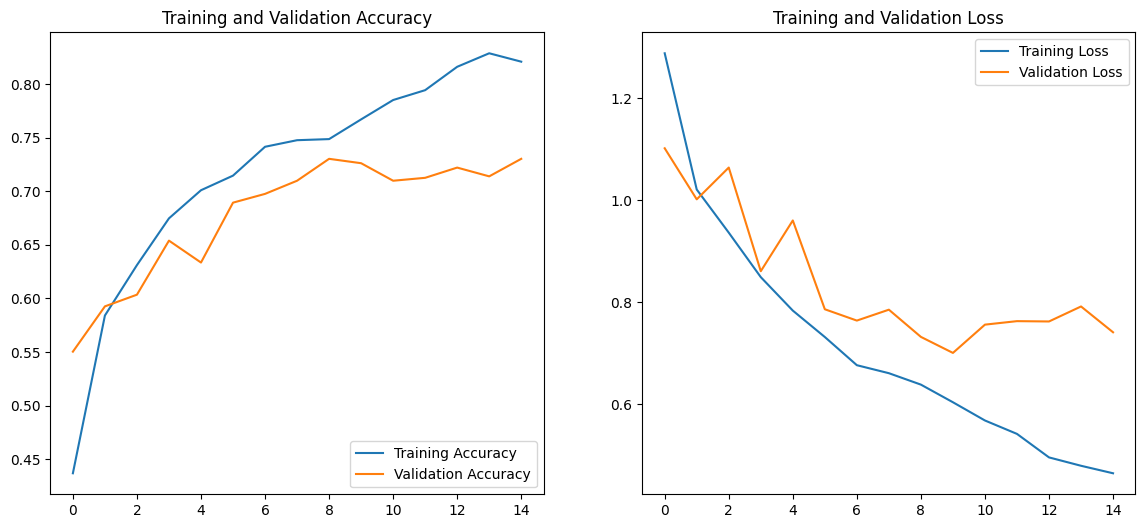

In [21]:
acc = hist_drop.history['accuracy']
val_acc = hist_drop.history['val_accuracy']

loss = hist_drop.history['loss']
val_loss = hist_drop.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

The results are very like the reference model. It seems that it reached the overfitting point earlier, on epoch 8.

3. Using batch size of 8

In [22]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [24]:
epochs = 20
hist_batch_size = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=8
)

Epoch 1/20
92/92 [==============================] - 59s 609ms/step - loss: 1.2985 - accuracy: 0.4401 - val_loss: 1.1183 - val_accuracy: 0.5545
Epoch 2/20
92/92 [==============================] - 56s 611ms/step - loss: 1.0643 - accuracy: 0.5824 - val_loss: 1.0611 - val_accuracy: 0.5749
Epoch 3/20
92/92 [==============================] - 57s 617ms/step - loss: 0.9785 - accuracy: 0.6134 - val_loss: 0.9576 - val_accuracy: 0.6213
Epoch 4/20
92/92 [==============================] - 57s 623ms/step - loss: 0.8931 - accuracy: 0.6543 - val_loss: 0.9195 - val_accuracy: 0.6308
Epoch 5/20
92/92 [==============================] - 59s 641ms/step - loss: 0.8456 - accuracy: 0.6631 - val_loss: 0.8580 - val_accuracy: 0.6567
Epoch 6/20
92/92 [==============================] - 58s 626ms/step - loss: 0.7906 - accuracy: 0.6935 - val_loss: 0.8768 - val_accuracy: 0.6676
Epoch 7/20
92/92 [==============================] - 56s 604ms/step - loss: 0.7392 - accuracy: 0.7197 - val_loss: 0.8182 - val_accuracy: 0.6785

Text(0.5, 1.0, 'Training and Validation Loss')

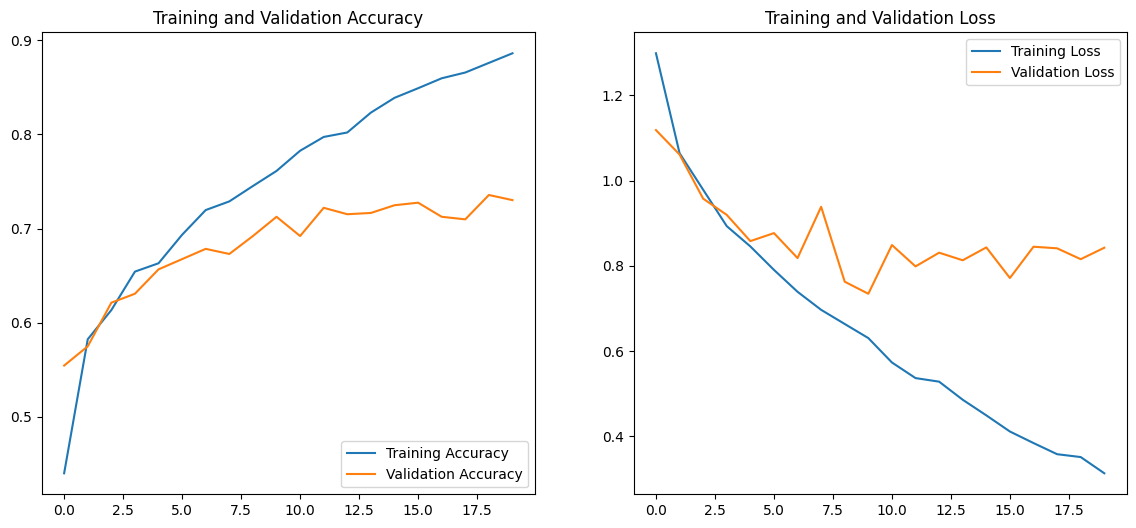

In [25]:
acc = hist_batch_size.history['accuracy']
val_acc = hist_batch_size.history['val_accuracy']

loss = hist_batch_size.history['loss']
val_loss = hist_batch_size.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

It seems that this model took longer to start overfitting. It seems that the overfit epoch is from epoch 12 on.

4. Using batch normalization

In [27]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(), 
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [29]:
epochs = 15
hist_batch_norm = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/15
92/92 [==============================] - 62s 637ms/step - loss: 1.3869 - accuracy: 0.4911 - val_loss: 1.5286 - val_accuracy: 0.4183
Epoch 2/15
92/92 [==============================] - 57s 627ms/step - loss: 1.0406 - accuracy: 0.5848 - val_loss: 1.4837 - val_accuracy: 0.2343
Epoch 3/15
92/92 [==============================] - 56s 608ms/step - loss: 0.9364 - accuracy: 0.6345 - val_loss: 1.3402 - val_accuracy: 0.5913
Epoch 4/15
92/92 [==============================] - 56s 611ms/step - loss: 0.8633 - accuracy: 0.6638 - val_loss: 1.1638 - val_accuracy: 0.5736
Epoch 5/15
92/92 [==============================] - 57s 617ms/step - loss: 0.8061 - accuracy: 0.6924 - val_loss: 0.9949 - val_accuracy: 0.6117
Epoch 6/15
92/92 [==============================] - 57s 620ms/step - loss: 0.7286 - accuracy: 0.7095 - val_loss: 1.0403 - val_accuracy: 0.5654
Epoch 7/15
92/92 [==============================] - 57s 623ms/step - loss: 0.7245 - accuracy: 0.7173 - val_loss: 1.0249 - val_accuracy: 0.6322

Text(0.5, 1.0, 'Training and Validation Loss')

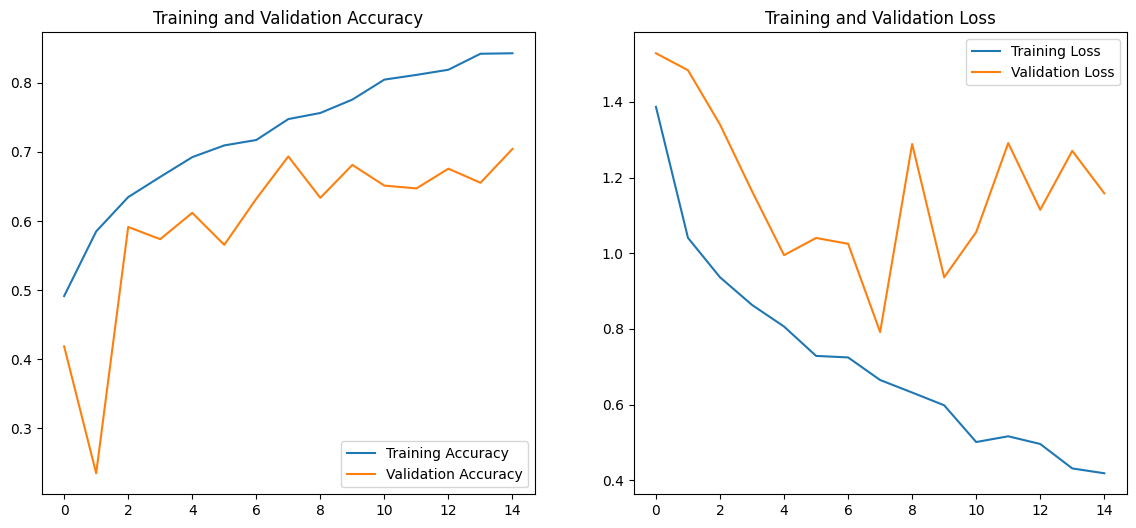

In [30]:
acc = hist_batch_norm.history['accuracy']
val_acc = hist_batch_norm.history['val_accuracy']

loss = hist_batch_norm.history['loss']
val_loss = hist_batch_norm.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

5. Using all modifications

In [31]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.BatchNormalization(),  
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalSparseEntropy(from_logits=True),
              metrics=['accuracy'],
)

In [33]:
epochs = 20
hist_all = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=8
)

Epoch 1/20
92/92 [==============================] - 59s 608ms/step - loss: 2.2725 - accuracy: 0.2033 - val_loss: 4.3942 - val_accuracy: 0.2302
Epoch 2/20
92/92 [==============================] - 56s 605ms/step - loss: 1.4988 - accuracy: 0.1955 - val_loss: 3.6921 - val_accuracy: 0.2262
Epoch 3/20
92/92 [==============================] - 56s 604ms/step - loss: 1.3388 - accuracy: 0.1945 - val_loss: 3.3335 - val_accuracy: 0.1921
Epoch 4/20
92/92 [==============================] - 56s 604ms/step - loss: 1.2147 - accuracy: 0.1853 - val_loss: 3.0582 - val_accuracy: 0.1676
Epoch 5/20
92/92 [==============================] - 56s 612ms/step - loss: 1.1956 - accuracy: 0.1795 - val_loss: 1.7900 - val_accuracy: 0.1853
Epoch 6/20
92/92 [==============================] - 57s 623ms/step - loss: 1.1631 - accuracy: 0.1928 - val_loss: 1.1997 - val_accuracy: 0.1880
Epoch 7/20
92/92 [==============================] - 56s 605ms/step - loss: 1.0982 - accuracy: 0.1890 - val_loss: 1.1859 - val_accuracy: 0.1948

Text(0.5, 1.0, 'Training and Validation Loss')

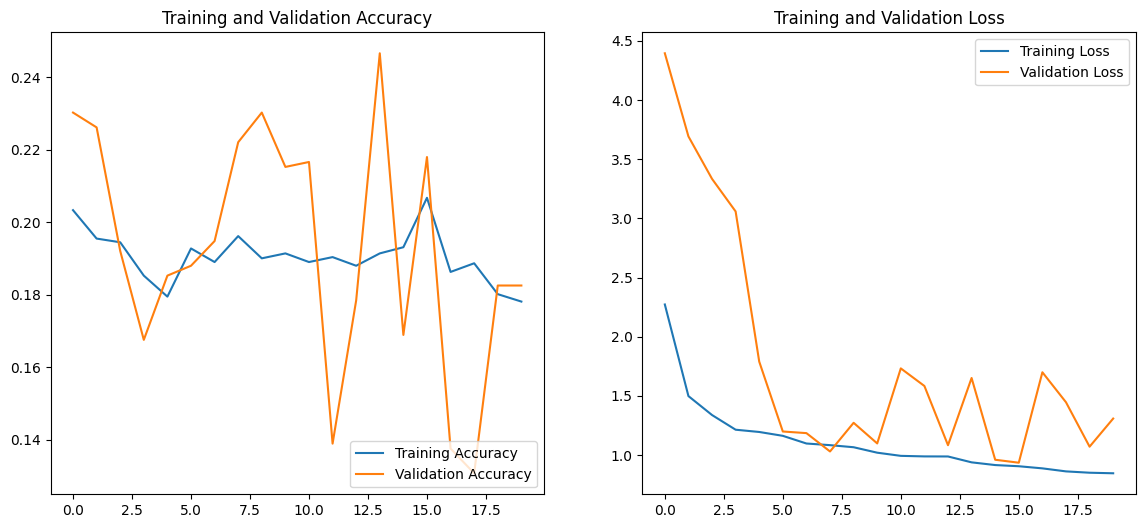

In [34]:
acc = hist_all.history['accuracy']
val_acc = hist_all.history['val_accuracy']

loss = hist_all.history['loss']
val_loss = hist_all.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

## Problem 2
Implement an autoencoder to learn to encode images from the dataset given in the image classification
tutorial, based on the reference model used in the previous exercise.

In [13]:
#smaller image because of memory issues
img_height = 64
img_width = 64

In [6]:
class Autoencoder(keras.Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(img_height * img_width * 3, activation='sigmoid'),
          layers.Reshape((img_height, img_width, 3))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [7]:
#custom loss because the images received in the y parameter are not normalized
# first they are normed, and afterwards the MSE is computed
@tf.function
def mse_loss(y_test, preds):
    y_test /= 255
    return tf.reduce_mean( tf.square(y_test - preds) )

In [8]:
img_width*img_height

4096

In [9]:
170/3670

0.04632152588555858

In [83]:
batch_size = 32
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.0463215288,
    subset="both",
    labels=None
)

Found 3670 files belonging to 1 classes.
Using 3500 files for training.
Using 170 files for validation.


In [11]:
temp = next(train_ds.as_numpy_iterator())[0]/255

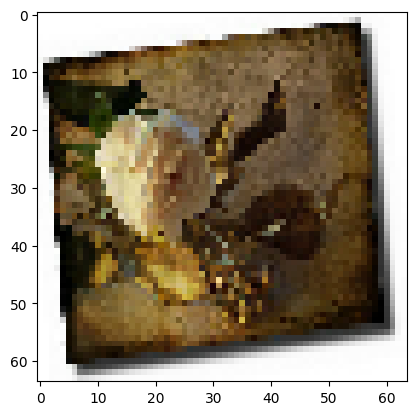

In [12]:
plt.imshow(temp)

In [84]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [85]:
train_ds = train_ds.map(lambda x: (x,x))

In [86]:
val_ds = val_ds.map(lambda x: (x,x))

1. Train an autoencoder on 3500 images from the image classification dataset, leaving 170 aside for validation.

With a latent dimension of 1024, we reduce the dimension to $0.25$ the original size.

In [98]:
latent_dim = 1024
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=mse_loss)

In [99]:
epochs = 30
autoencoder.fit(train_ds, epochs=epochs, validation_data=val_ds, shuffle=True)

Epoch 1/30
110/110 [==============================] - 3s 20ms/step - loss: 0.0616 - val_loss: 0.0521
Epoch 2/30
110/110 [==============================] - 2s 18ms/step - loss: 0.0490 - val_loss: 0.0474
Epoch 3/30
110/110 [==============================] - 2s 18ms/step - loss: 0.0434 - val_loss: 0.0434
Epoch 4/30
110/110 [==============================] - 2s 18ms/step - loss: 0.0410 - val_loss: 0.0418
Epoch 5/30
110/110 [==============================] - 2s 18ms/step - loss: 0.0386 - val_loss: 0.0456
Epoch 6/30
110/110 [==============================] - 2s 18ms/step - loss: 0.0375 - val_loss: 0.0404
Epoch 7/30
110/110 [==============================] - 2s 18ms/step - loss: 0.0354 - val_loss: 0.0394
Epoch 8/30
110/110 [==============================] - 2s 18ms/step - loss: 0.0346 - val_loss: 0.0393
Epoch 9/30
110/110 [==============================] - 2s 19ms/step - loss: 0.0335 - val_loss: 0.0409
Epoch 10/30
110/110 [==============================] - 2s 19ms/step - loss: 0.0323 - val_lo

In [133]:
autoencoder.save_weights("autoencoder_weights", save_format="tf")

In [135]:
autoencoder.load_weights("autoencoder_weights")

2. Sample 3 examples from each dataset split, the train and validation set, and use the autoencoder to encode and decode the images, comparing them with the original.

In [19]:
from random import choices

In [100]:
train_selected = choices(range(3500), k=3)
val_selected = choices(range(170), k=3)

In [101]:
train_images, val_images = [], []
for idx in train_selected:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    train_images.append( 
        list(train_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )
    
for idx in val_selected:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    val_images.append( 
        list(val_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )

1/1 [==============================] - 0s 24ms/step


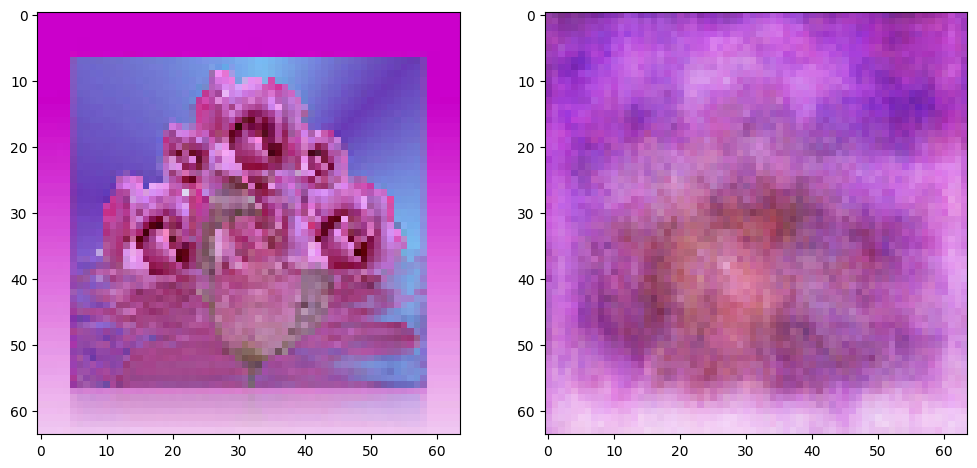

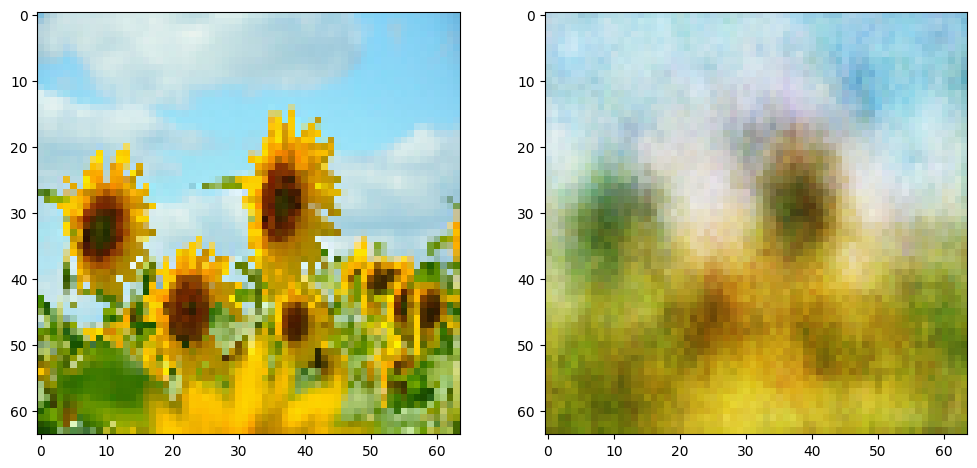

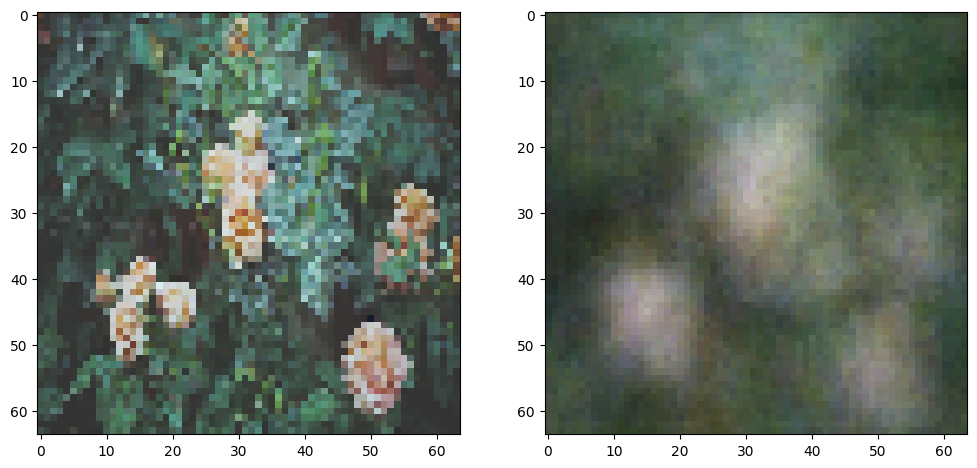

In [102]:
for image in train_images:
    im_decoded = autoencoder.predict(image.reshape(1, *image.shape)).reshape(image.shape)
    
    f, ax = plt.subplots(1,2, figsize=(12,6))
    
    ax[0].imshow(image/255)
    ax[1].imshow(im_decoded)

The model did not recover the image fully but captured the overall pattern of this images from the training set


1/1 [==============================] - 0s 27ms/step


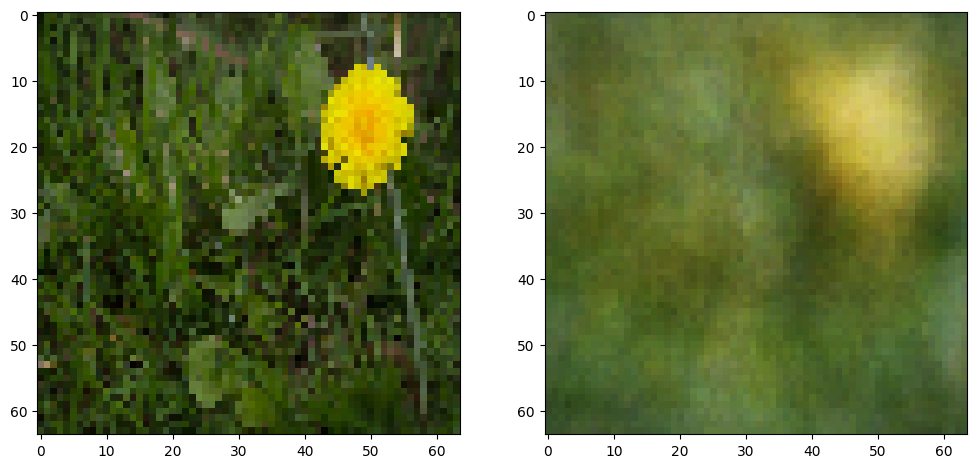

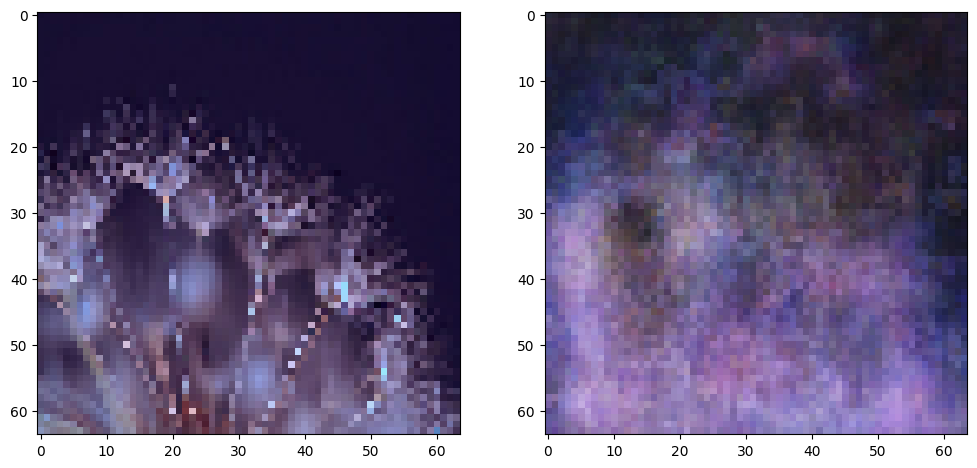

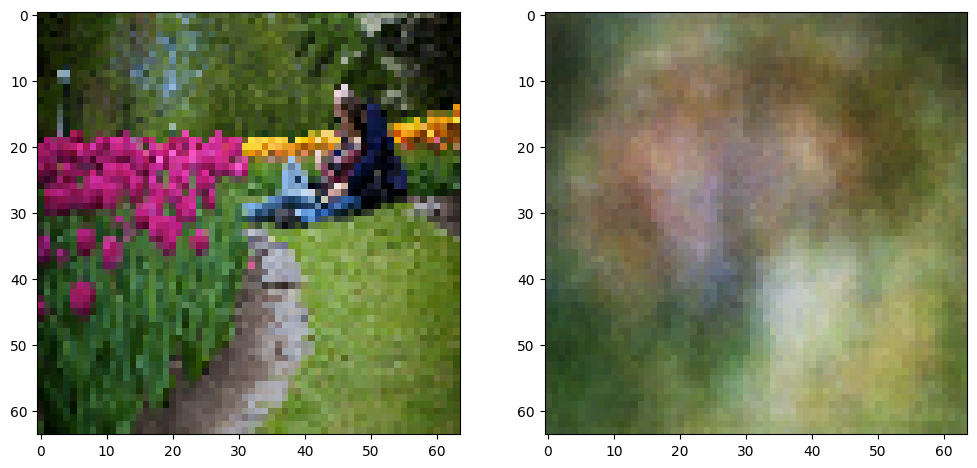

In [103]:
for image in val_images:
    im_decoded = autoencoder.predict(image.reshape(1, *image.shape)).reshape(image.shape)
    
    f, ax = plt.subplots(1,2, figsize=(12,6))
    
    ax[0].imshow(image/255)
    ax[1].imshow(im_decoded)

In the validation set we can see that the model could recover the general pattern for simple images that it had not previously seen. <br>
However, this third image with very distinct colors and patterns cannot be perceived by the decoded image. 

3. Sample 3 examples from each dataset split, the train and validation set, encoding the images using the Encoder, obtaining the intermediate representations. Using the GaussianNoise layer, introduce 5%, 10% and 20% noise to the representations. Finally, decode the repre-sentations using the Decoder and analyze the obtain

In [146]:
train_noise_idx = choices(range(3500), k=3)
val_noise_idx = choices(range(170), k=3)

In [127]:
noise_models = [Sequential([
    layers.GaussianNoise(stddev=i) 
]) for i in [0.05, 0.1, 0.2]]

In [147]:
train_noise_images = []
val_noise_images = []

for idx in train_noise_idx:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    train_noise_images.append( 
        list(train_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )
    
for idx in val_noise_idx:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    val_noise_images.append( 
        list(val_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )

In [148]:
train_encodings = [[] for i in range(3)]
val_encodings = [[] for i in range(3)]

for noise in noise_models:
    for i, image in enumerate(train_noise_images):
        encoded = autoencoder.encoder.predict( image.reshape(1, *image.shape) )
        train_encodings[i].append(noise(encoded))
        
for noise in noise_models:
    for i, image in enumerate(val_noise_images):
        encoded = autoencoder.encoder.predict( image.reshape(1, *image.shape) )
        val_encodings[i].append(noise(encoded))


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


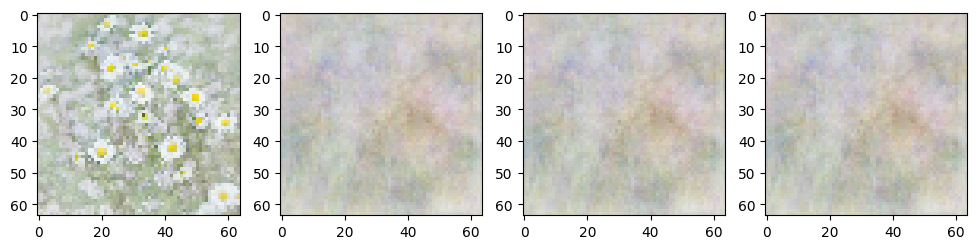

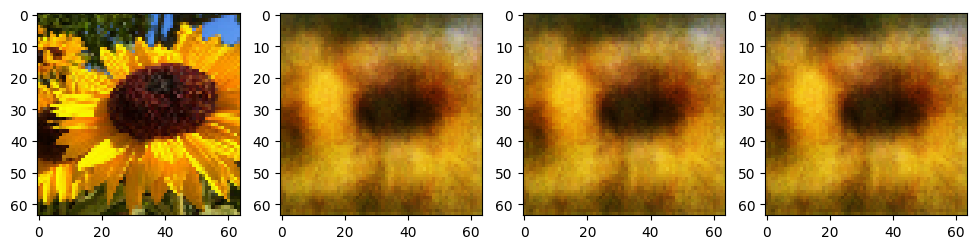

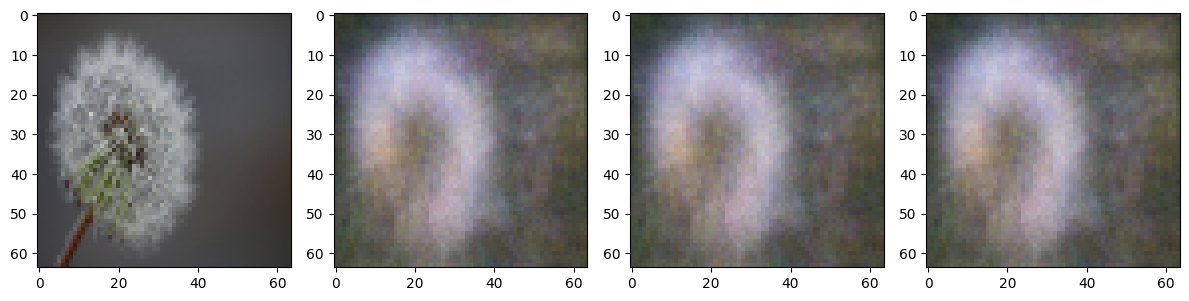

In [149]:
for i, images in enumerate(train_encodings):
    f, ax = plt.subplots(1,4, figsize=(12,6))
    ax[0].imshow(train_noise_images[i]/255)
    for idx, image in enumerate(images, start=1):
        im_decoded = autoencoder.decoder.predict(image).reshape(img_width, img_height, 3)
        ax[idx].imshow(im_decoded)
f.tight_layout()

1/1 [==============================] - 0s 22ms/step


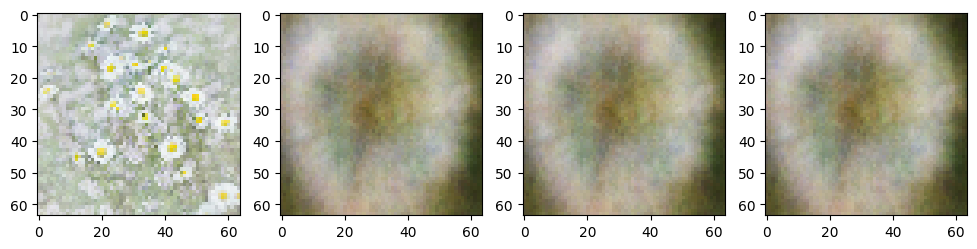

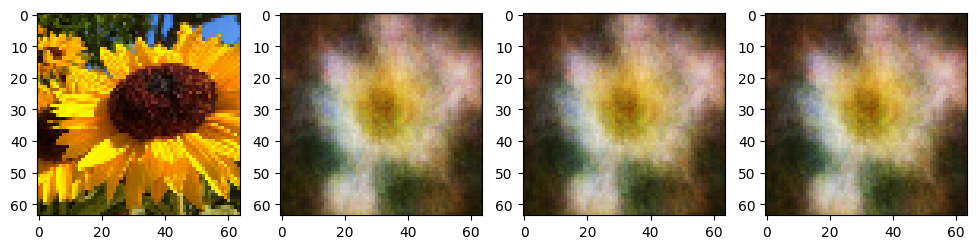

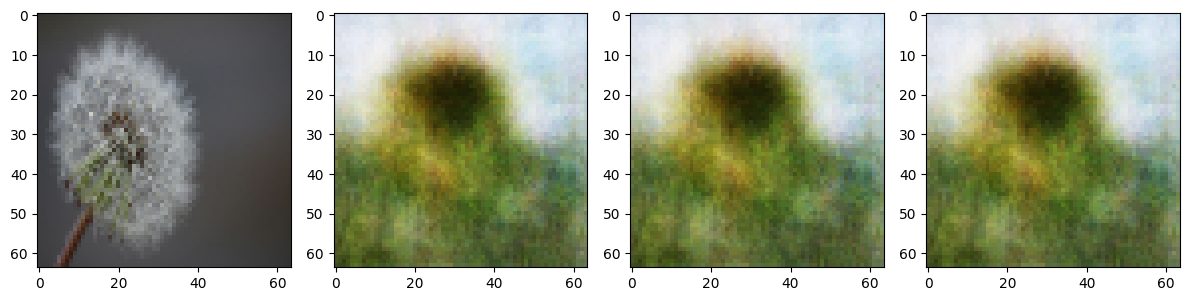

In [150]:
for i, images in enumerate(val_encodings):
    f, ax = plt.subplots(1,4, figsize=(12,6))
    ax[0].imshow(train_noise_images[i]/255)
    for idx, image in enumerate(images, start=1):
        im_decoded = autoencoder.decoder.predict(image).reshape(img_width, img_height, 3)
        ax[idx].imshow(im_decoded)
f.tight_layout()

4. Sample 3 examples from each dataset split, the train and validation set, and introduce 5%, 10% and 20% noise (GaussianNoise Layer) to the image pixels (input level). Run the autoencoder with these inputs and analyze the obtain

In [151]:
train_noise_idx = choices(range(3500), k=3)
val_noise_idx = choices(range(170), k=3)

In [152]:
noise_models = [Sequential([
    layers.GaussianNoise(stddev=i) 
]) for i in [0.05, 0.1, 0.2]]

In [153]:
train_noise_images = []
val_noise_images = []

for idx in train_noise_idx:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    train_noise_images.append( 
        list(train_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )
    
for idx in val_noise_idx:
    batch_idx = int(idx/batch_size)
    image_idx = idx%batch_size
    
    val_noise_images.append( 
        list(val_ds.as_numpy_iterator())[batch_idx][0][image_idx]
    )

In [161]:
train_noisy = [[] for i in range(3)]
val_noisy = [[] for i in range(3)]

for noise in noise_models:
    for i, image in enumerate(train_noise_images):
        train_noisy[i].append(np.array(noise(image)))
        
for noise in noise_models:
    for i, image in enumerate(val_noise_images):
        val_noisy[i].append(np.array(noise(image)))


1/1 [==============================] - 0s 25ms/step


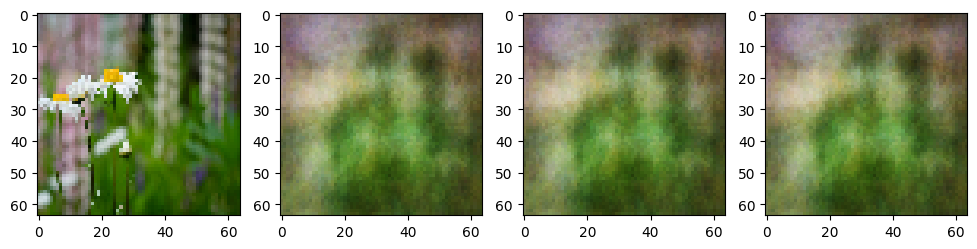

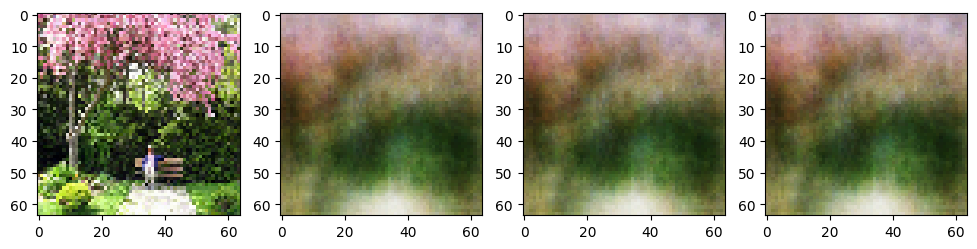

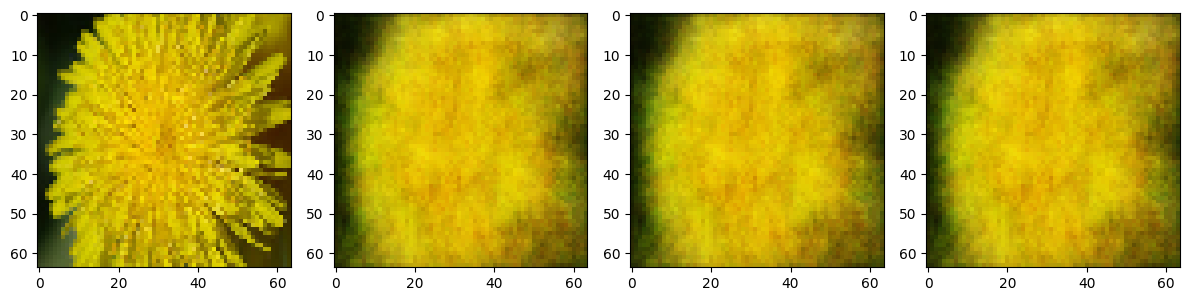

In [173]:
for i, images in enumerate(train_noisy):
    f, ax = plt.subplots(1,4, figsize=(12,6))
    ax[0].imshow(train_noisy[i][0]/255)
    for idx, image in enumerate(images, start=1):
        im_prime = autoencoder.predict(image.reshape((1, *image.shape))).reshape(img_width, img_height, 3)
        ax[idx].imshow(im_prime)
f.tight_layout()

1/1 [==============================] - 0s 25ms/step


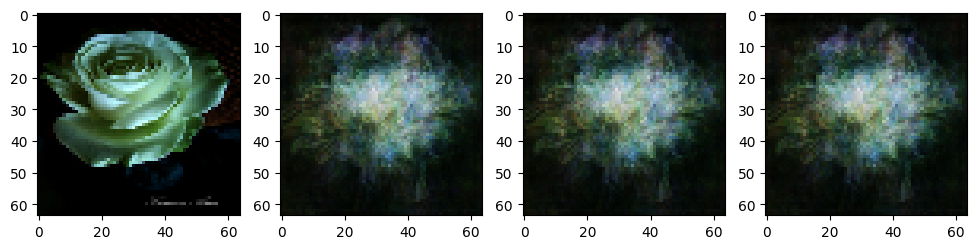

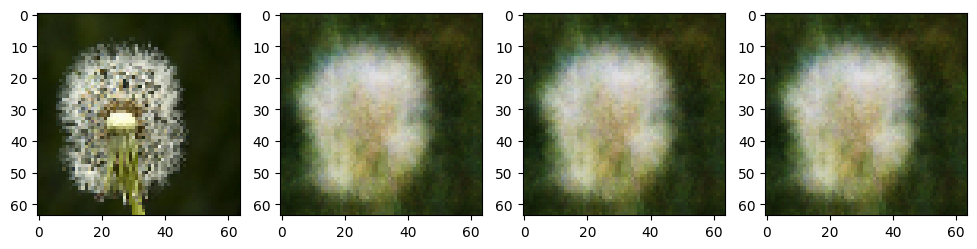

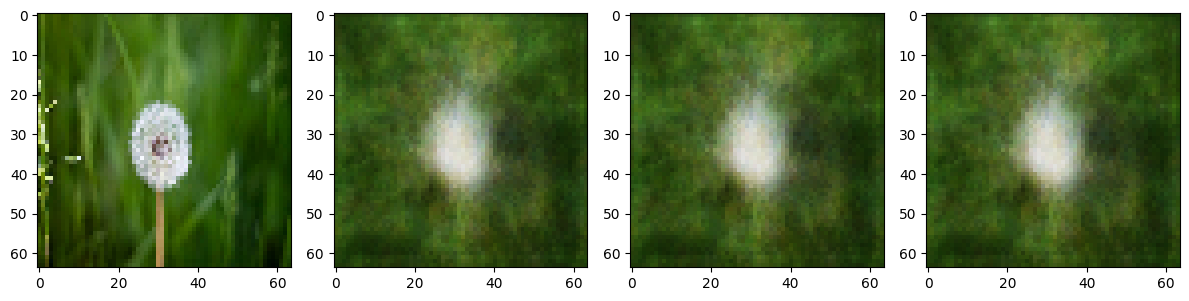

In [171]:
for i, images in enumerate(val_noisy):
    f, ax = plt.subplots(1,4, figsize=(12,6))
    ax[0].imshow(val_noisy[i][0]/255)
    for idx, image in enumerate(images, start=1):
        im_prime = autoencoder.predict(image.reshape((1, *image.shape))).reshape(img_width, img_height, 3)
        ax[idx].imshow(im_prime)
f.tight_layout()